In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
%matplotlib inline

## Data Understanding

In [3]:
ibmhr=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibmhr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


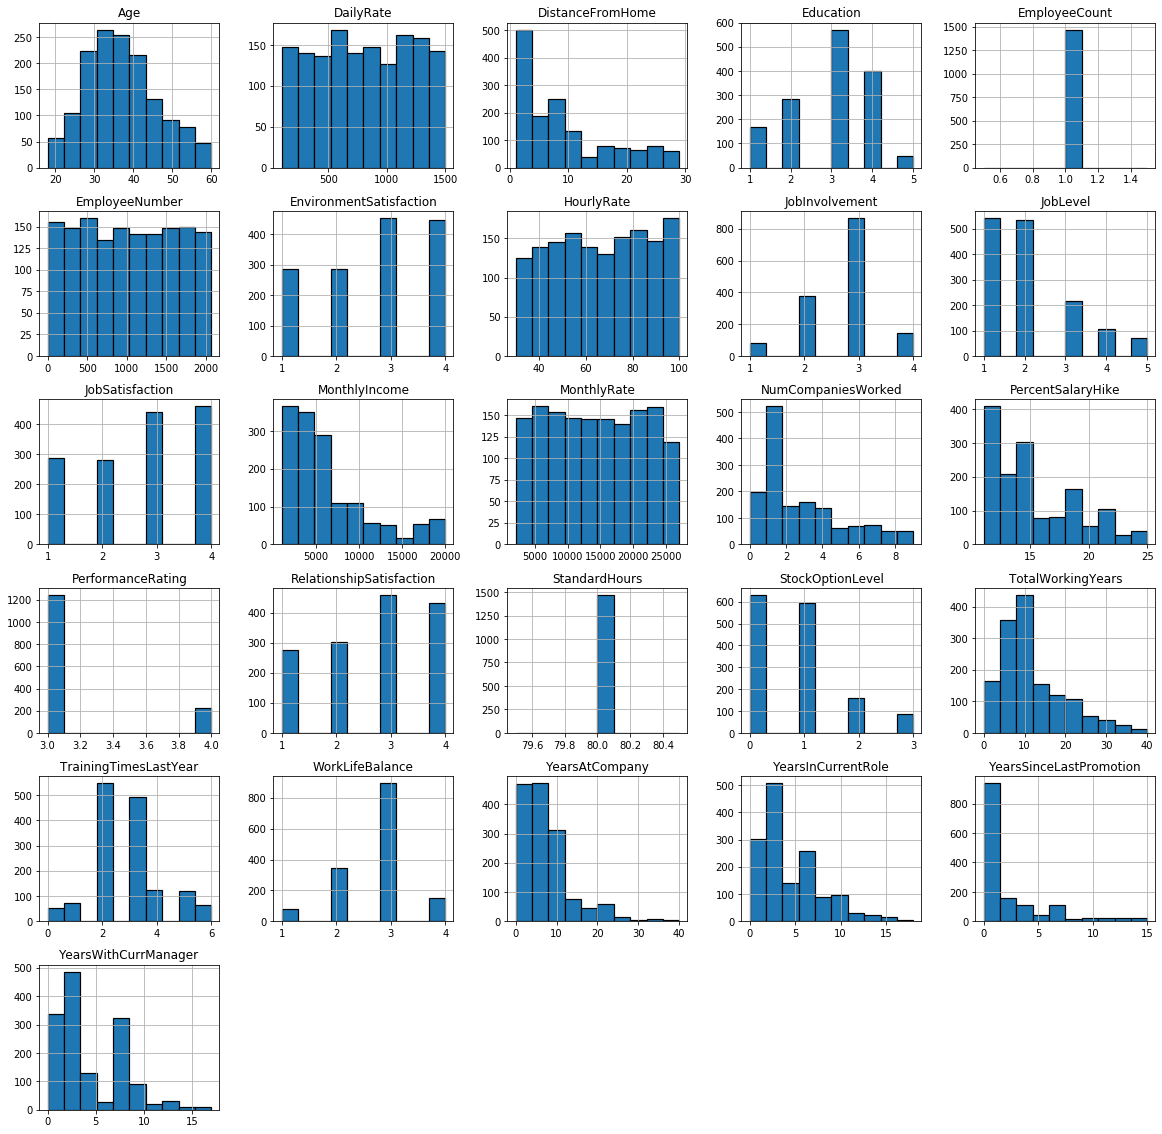

In [4]:
# Histogram
ibmhr.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

No     1233
Yes     237
Name: Attrition, dtype: int64


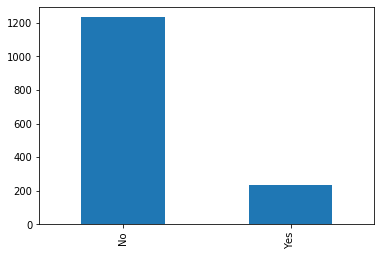

In [5]:
# Barplot——Imbalance problem
ibmhr['Attrition'].value_counts().plot(kind='bar')
print(ibmhr['Attrition'].value_counts())
plt.show()

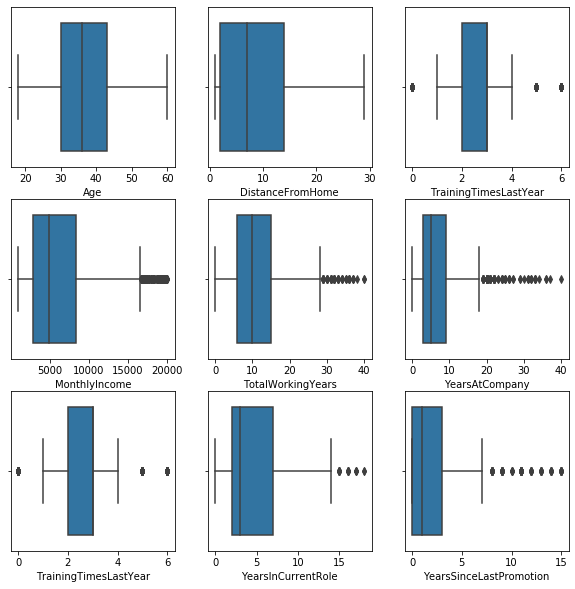

In [6]:
# Boxplots
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.subplot(331) 
ax=sns.boxplot(ibmhr['Age'])
plt.subplot(332) 
ax=sns.boxplot(ibmhr['DistanceFromHome'])
plt.subplot(333) 
ax=sns.boxplot(ibmhr['TrainingTimesLastYear'])
plt.subplot(334) 
ax=sns.boxplot(ibmhr['MonthlyIncome'])
plt.subplot(335)
ax=sns.boxplot(ibmhr['TotalWorkingYears'])
plt.subplot(336)
ax=sns.boxplot(ibmhr['YearsAtCompany'])
plt.subplot(337)
ax=sns.boxplot(ibmhr['TrainingTimesLastYear'])
plt.subplot(338)
ax=sns.boxplot(ibmhr['YearsInCurrentRole'])
plt.subplot(339)
ax=sns.boxplot(ibmhr['YearsSinceLastPromotion'])
plt.show()

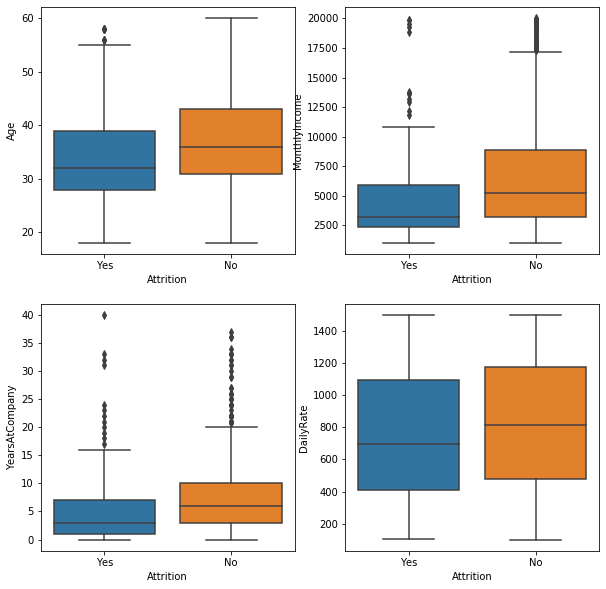

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.subplot(221)
ax=sns.boxplot(x=ibmhr['Attrition'], y=ibmhr['Age'])
plt.subplot(222)
ax=sns.boxplot(x=ibmhr['Attrition'], y=ibmhr['MonthlyIncome'])
plt.subplot(223)
ax=sns.boxplot(x=ibmhr['Attrition'], y=ibmhr['YearsAtCompany'])
plt.subplot(224)
ax=sns.boxplot(x=ibmhr['Attrition'], y=ibmhr['DailyRate'])
plt.show()

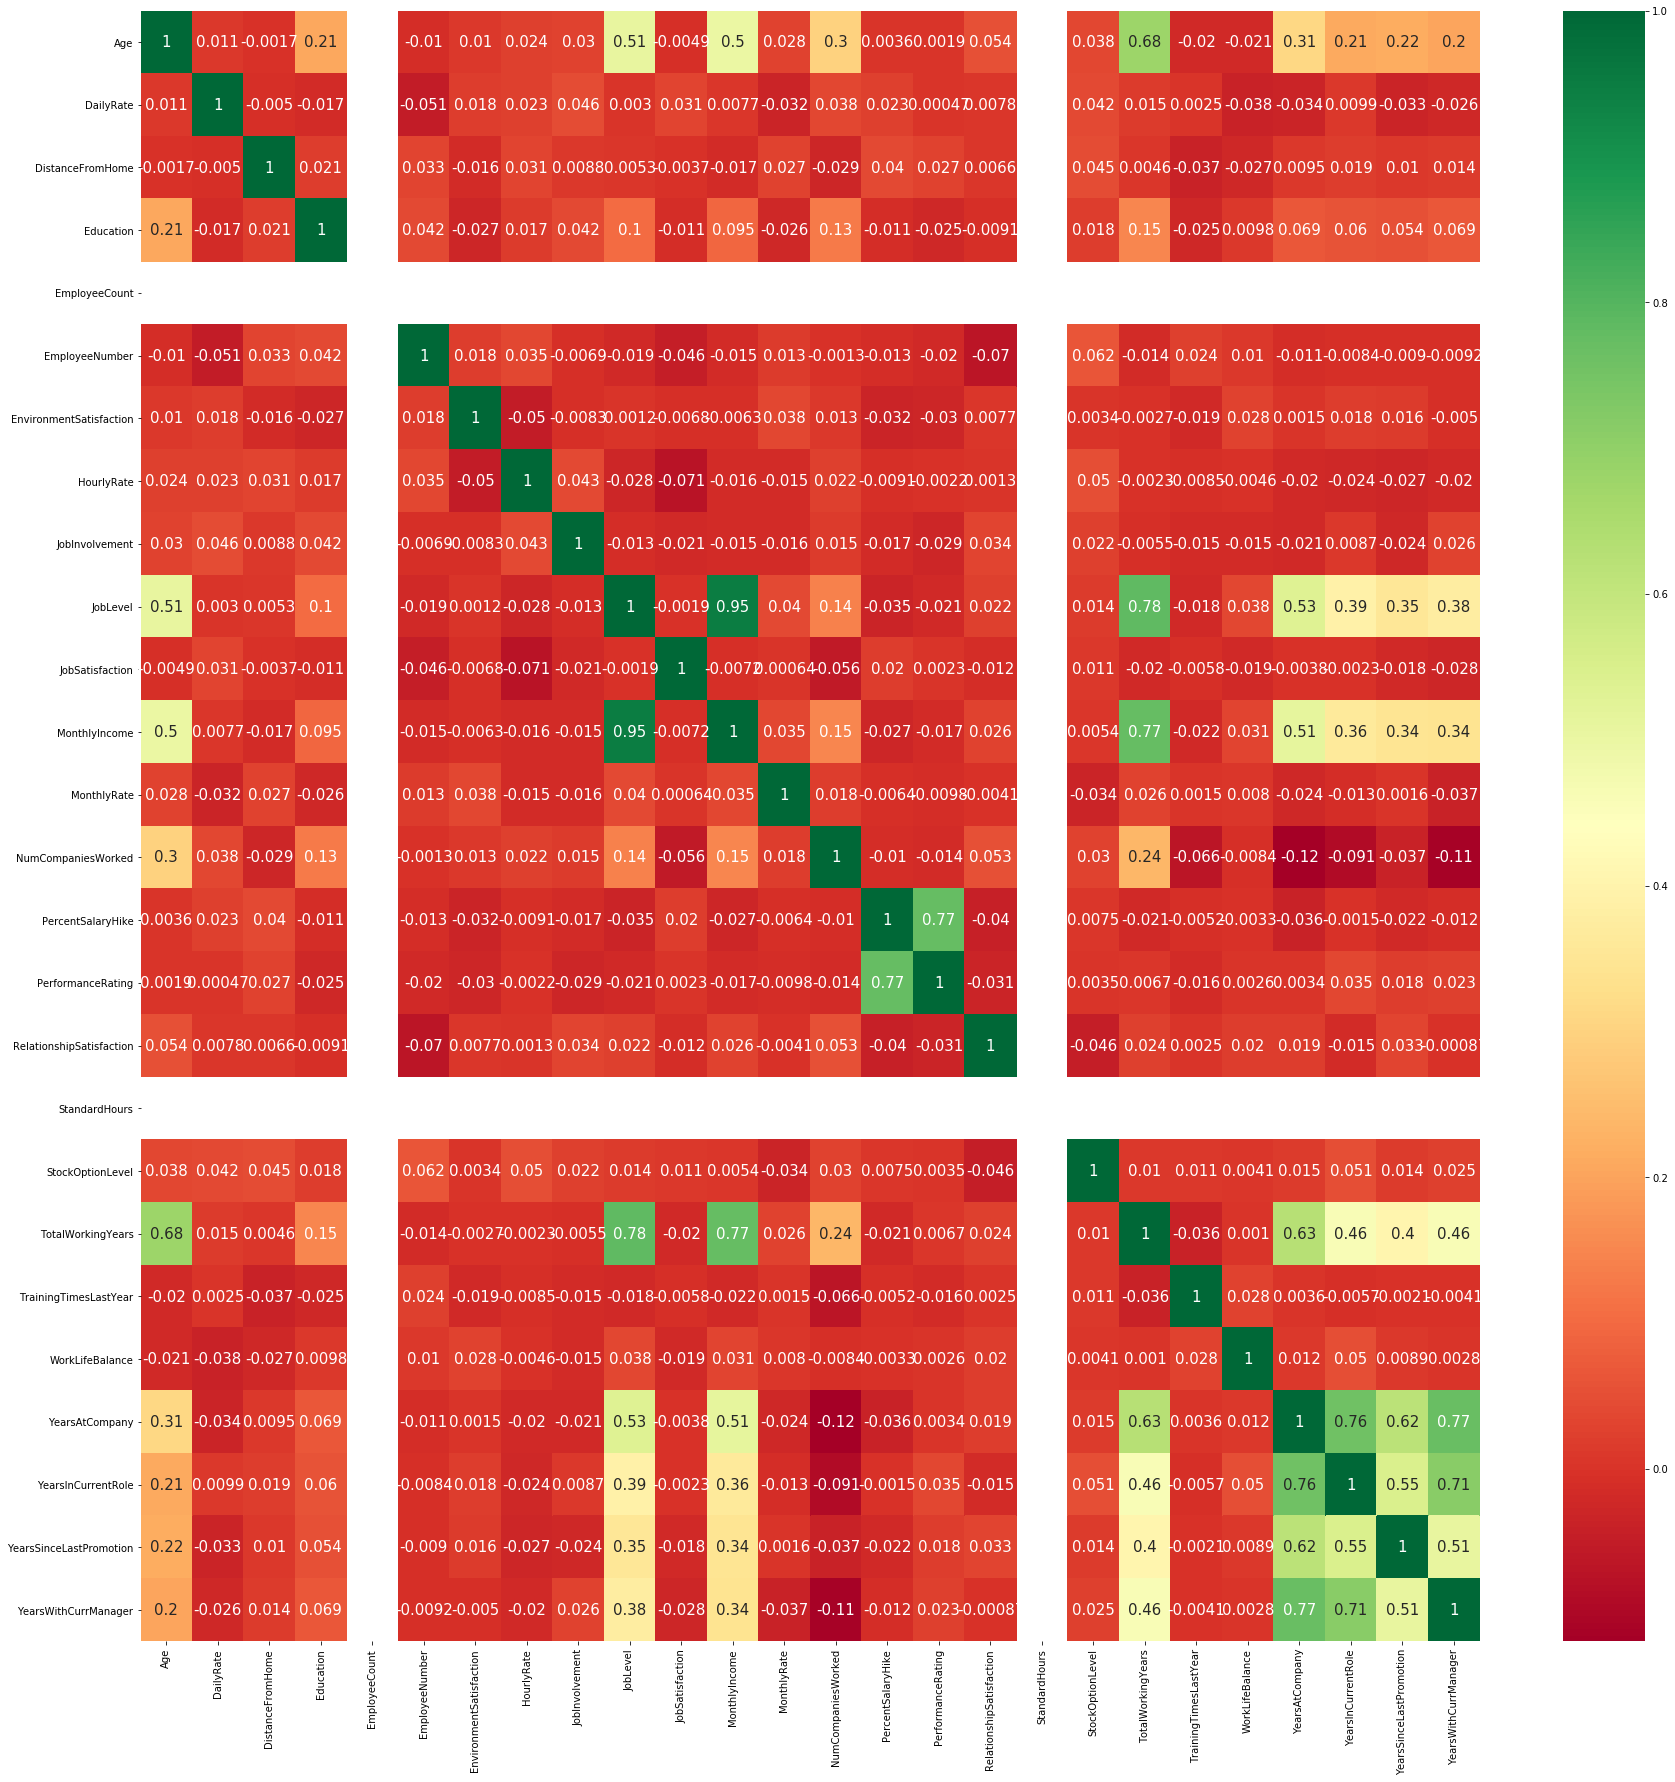

In [8]:
# Correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(ibmhr.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

## Data Preparation

In [9]:
ibmhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [10]:
# Delete uninformative attributes
ibmhr=ibmhr.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

In [11]:
# Change "Attrition" to 0/1
ibmhr['Attrition'] = ibmhr['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [12]:
# Create dummy variables for categorical features
ibmhr=pd.get_dummies(ibmhr, columns=['BusinessTravel'], prefix=['BusinessTravel'], drop_first=False)
ibmhr=pd.get_dummies(ibmhr, columns=['Department'], prefix=['Department'], drop_first=False)
ibmhr=pd.get_dummies(ibmhr, columns=['EducationField'], prefix=['EducationField'], drop_first=False)
ibmhr=pd.get_dummies(ibmhr, columns=['Gender'], prefix=['Gender'], drop_first=False)
ibmhr=pd.get_dummies(ibmhr, columns=['JobRole'], prefix=['JobRole'], drop_first=False)
ibmhr=pd.get_dummies(ibmhr, columns=['MaritalStatus'], prefix=['MaritalStatus'], drop_first=False)
ibmhr=pd.get_dummies(ibmhr, columns=['OverTime'], prefix=['OverTime'], drop_first=False)

In [13]:
# Create features and target variable
X = ibmhr.drop('Attrition', axis=1)
y = ibmhr['Attrition']

In [14]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [15]:
# Solve the imbalance problem in training set
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
X_sm, y_sm = oversampler.fit_sample(X_train,y_train)
print(y_train.value_counts())
print(y_sm.value_counts())

0    862
1    167
Name: Attrition, dtype: int64
1    862
0    862
Name: Attrition, dtype: int64


## Model Building

In [16]:
# Build a decision tree classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={"criterion":("gini", "entropy"),'min_samples_split' : range(5,50,5),'max_depth': range(1,20,1)}
clf_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf_tree,parameters, cv=5)
clf.fit(X_sm, y_sm)
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=15, random_state=0)

In [17]:
model = clf.best_estimator_
model.fit(X_sm, y_sm)

DecisionTreeClassifier(max_depth=7, min_samples_split=15, random_state=0)

In [18]:
# Build a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
params_rf = {'criterion':["gini","entropy"],'n_estimators': [50, 100, 150, 200],'max_depth':range(10,100,10)}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_sm, y_sm)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'criterion': 'gini', 'max_depth': 90, 'n_estimators': 200}


In [19]:
rf_best.fit(X_sm,y_sm)

RandomForestClassifier(max_depth=90, n_estimators=200)

## Model Evaluation

In [20]:
# 10-fold cross validation
from sklearn.model_selection import cross_val_score
score_cv1 = cross_val_score(model, X_sm, y_sm, cv=10,scoring='roc_auc')
score_cv2 = cross_val_score(rf_best, X_sm, y_sm, cv=10,scoring='roc_auc')
print(score_cv1.mean())
print(score_cv2.mean())

0.917817335248006
0.9837222512324152


In [21]:
# Make predictions on test set
pred_tree = model.predict(X_test)
pred_rf = rf_best.predict(X_test)
prob_tree = model.predict_proba(X_test)
prob_rf = rf_best.predict_proba(X_test)

In [22]:
# Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, pred_tree, normalize=True, sample_weight=None))
print("Accuracy:",accuracy_score(y_test, pred_rf, normalize=True, sample_weight=None))

Accuracy: 0.7913832199546486
Accuracy: 0.873015873015873


In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:", confusion_matrix(y_test, pred_tree))
print("Confusion Matrix:", confusion_matrix(y_test, pred_rf))

Confusion Matrix: [[327  44]
 [ 48  22]]
Confusion Matrix: [[361  10]
 [ 46  24]]


In [24]:
from sklearn.metrics import classification_report
print("Classification Report:",classification_report(y_test, pred_tree))
print("Classification Report:",classification_report(y_test, pred_rf))

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.88      0.88       371
           1       0.33      0.31      0.32        70

    accuracy                           0.79       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.79      0.79      0.79       441

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.97      0.93       371
           1       0.71      0.34      0.46        70

    accuracy                           0.87       441
   macro avg       0.80      0.66      0.69       441
weighted avg       0.86      0.87      0.85       441



AUC: 0.6558914131690412


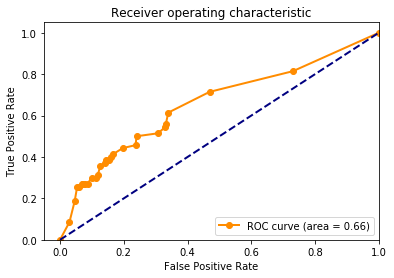

In [27]:
# ROC curve for decision tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, prob_tree[:,1], pos_label=1)
roc_auc=auc(fpr,tpr)
print("AUC:",roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AUC: 0.8025991528686947


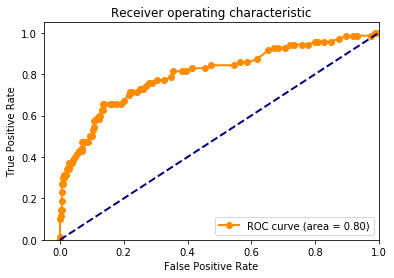

In [28]:
# ROC curve for random forest
fpr, tpr, thresholds = roc_curve(y_test, prob_rf[:,1], pos_label=1)
roc_auc=auc(fpr,tpr)
print("AUC:",roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()